In [2]:
import sys
sys.path.append('..')

import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.plot_utils import hist, count, scatter
from dotenv import load_dotenv

In [4]:
# basic data analysis - see https://www.kaggle.com/code/antoniosabatini/tiktok-popularity-track-eda-ml-models/notebook
# for info on audio features see https://developer.spotify.com/documentation/web-api/reference/get-audio-features

CSV_PATH = '../data/chartex_final.csv'

df = pd.read_csv(CSV_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         3932 non-null   object 
 1   track_pop          3932 non-null   int64  
 2   artist             3932 non-null   object 
 3   artist_pop         3932 non-null   int64  
 4   album              3932 non-null   object 
 5   danceability       3932 non-null   float64
 6   energy             3932 non-null   float64
 7   key                3932 non-null   float64
 8   loudness           3932 non-null   float64
 9   mode               3932 non-null   float64
 10  speechiness        3932 non-null   float64
 11  acousticness       3932 non-null   float64
 12  instrumentalness   3932 non-null   float64
 13  liveness           3932 non-null   float64
 14  valence            3932 non-null   float64
 15  tempo              3932 non-null   float64
 16  id                 3932 

In [6]:
#dicard string type features
df = df.drop(['track_name', 'artist', 'album', 'id', 'song_name', 'artist_name'], axis = 1, errors='ignore')

# basic statistics
print(df.describe())

         track_pop   artist_pop  danceability       energy          key  \
count  3932.000000  3932.000000   3932.000000  3932.000000  3932.000000   
mean     39.534079    53.755849      0.684398     0.629991     5.259156   
std      27.037639    22.152220      0.159415     0.200178     3.648960   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%      12.000000    39.000000      0.587000     0.503750     2.000000   
50%      44.000000    56.000000      0.710000     0.656000     5.000000   
75%      62.000000    71.000000      0.802000     0.782000     9.000000   
max      95.000000   100.000000      0.985000     1.000000    11.000000   

         loudness         mode  speechiness  acousticness  instrumentalness  \
count  3932.00000  3932.000000  3932.000000   3932.000000       3932.000000   
mean     -7.13396     0.565107     0.109868      0.304975          0.082582   
std       3.89145     0.495806     0.113087      0.286771          0.232230   
min     

In [7]:
# Count the number of unique values in each column
print((df.nunique()/len(df)).sort_values())

mode                 0.000509
time_signature       0.001272
key                  0.003052
artist_pop           0.023906
track_pop            0.024415
danceability         0.179552
energy               0.216938
valence              0.247457
liveness             0.255341
speechiness          0.270855
instrumentalness     0.421414
acousticness         0.441251
number_of_videos     0.754578
loudness             0.823754
tempo                0.901322
duration_ms          0.949644
zcr                  0.977365
rolloff              0.980926
chroma_stft          0.985758
rmse                 0.986012
spec_cent            0.986012
spec_bw              0.986012
mfcc                 0.986012
total_likes_count    1.000000
dtype: float64


## Distribution of the numerical and categorical columns

On the original features:

c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

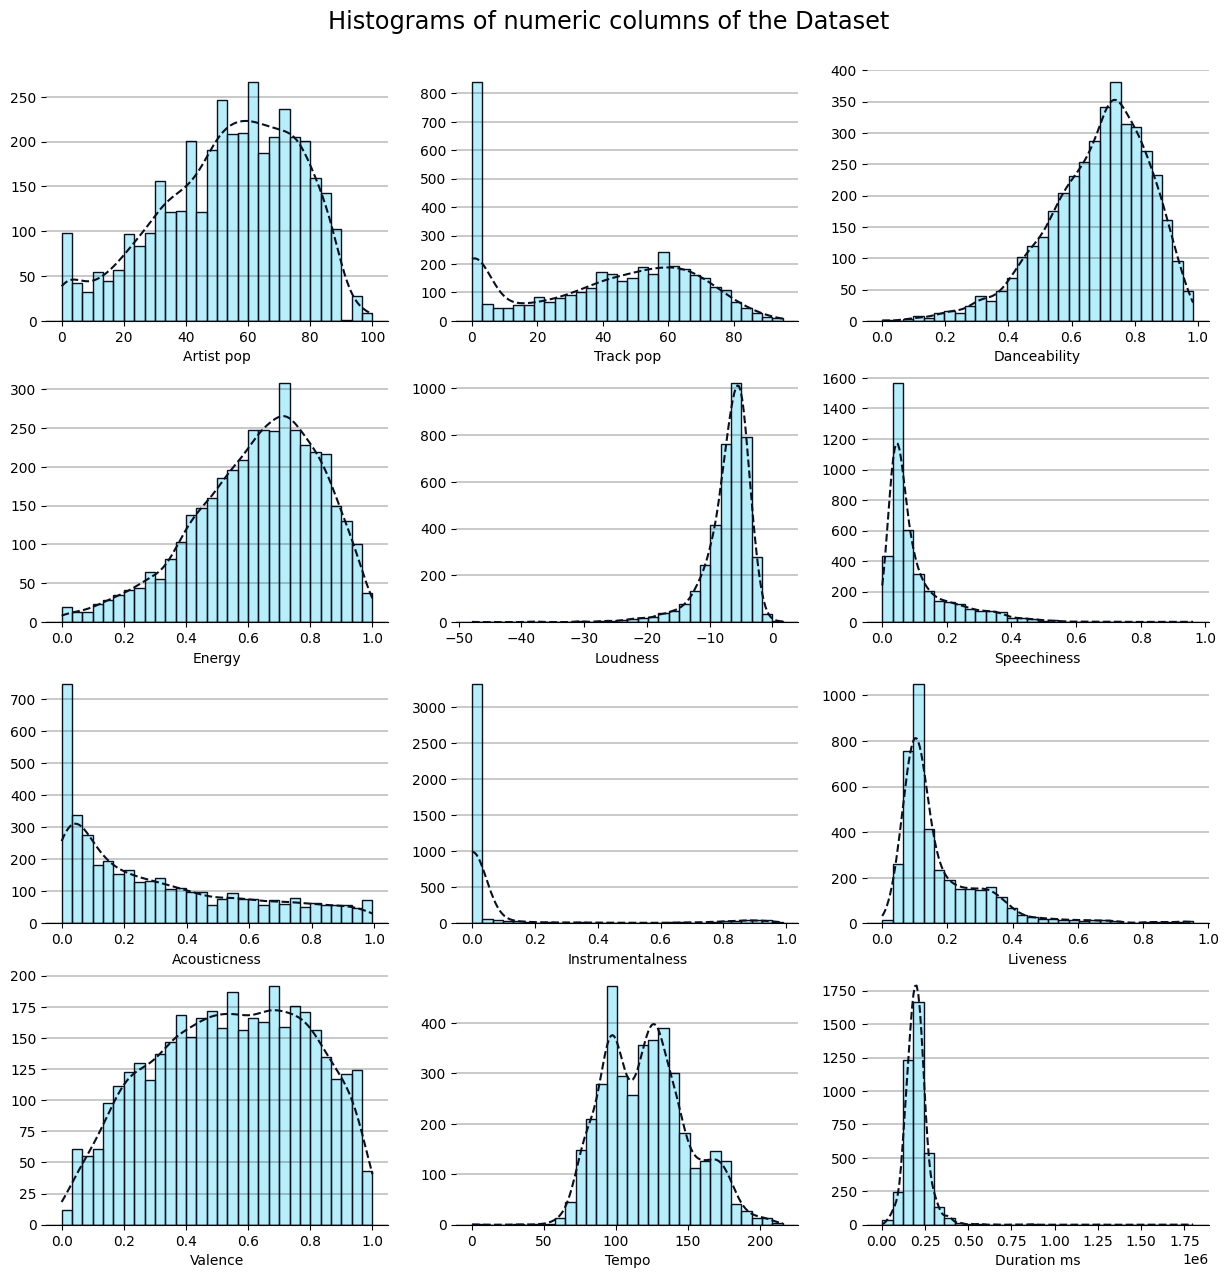

In [10]:
# distribution graphs for the numerical columns

cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 
        'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
        'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i, col in enumerate(cols):
    
    row_index = i // 3
    col_index = i % 3
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()


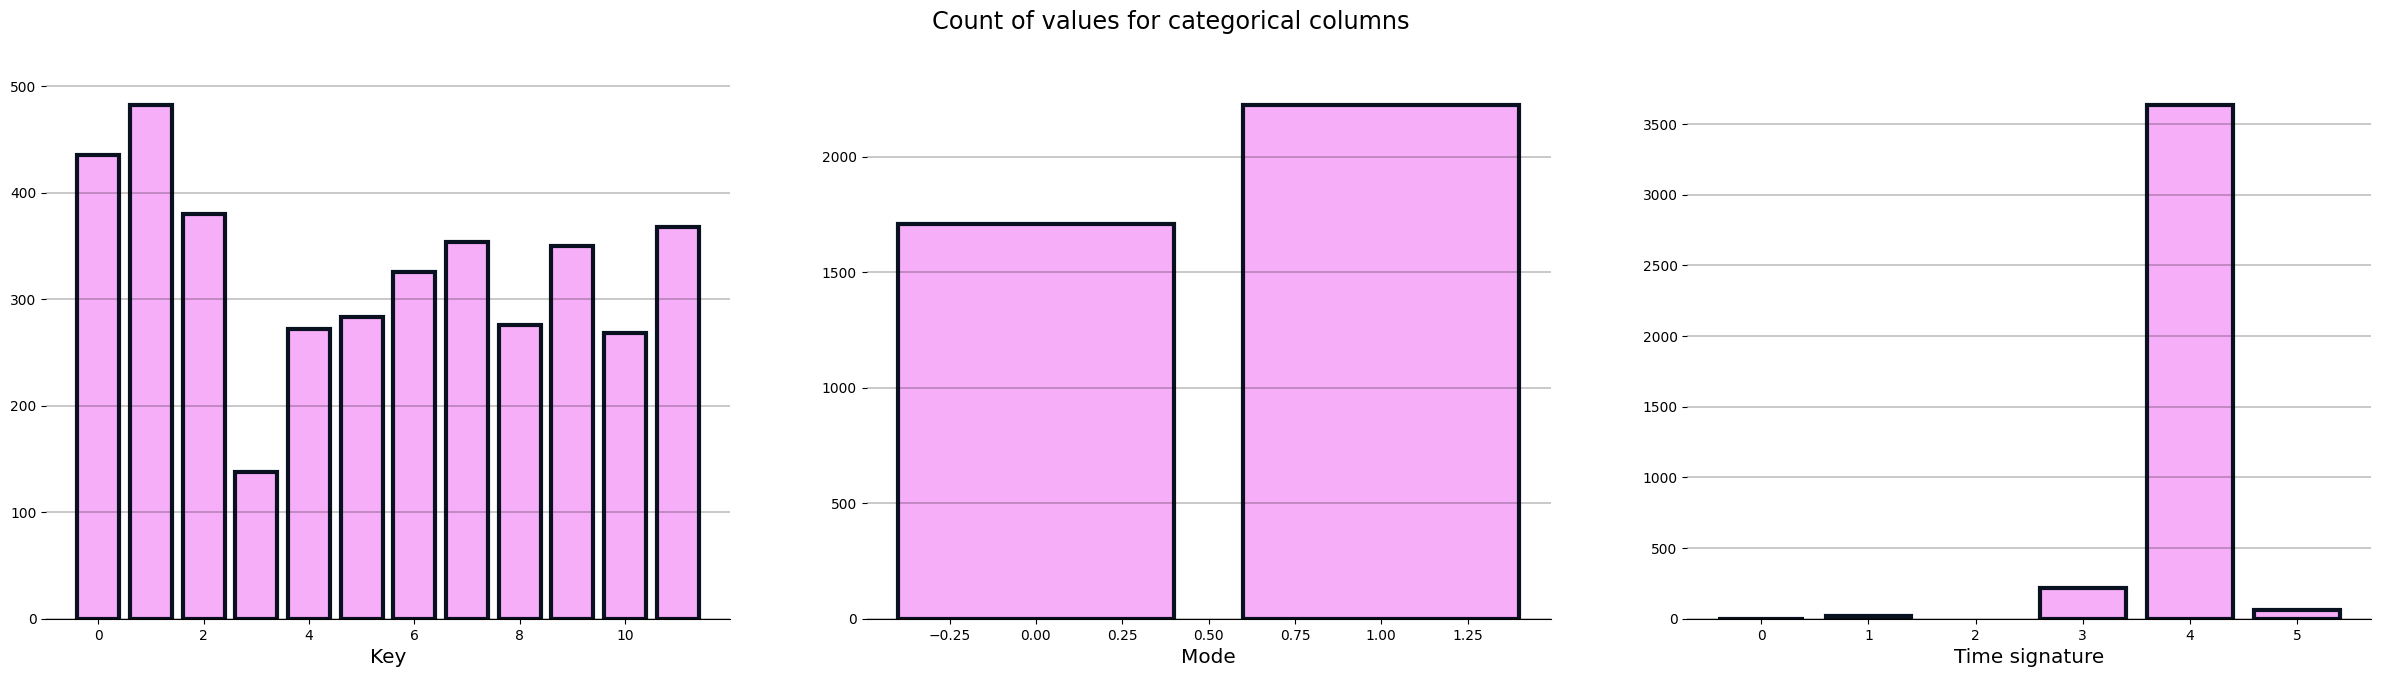

In [9]:
# distribution graphs for categorical columns

cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

We can see that for the most part, the songs from this dataset, which are all relatively popular on Tiktok (more than 100k videos) are:
- Energetic, high tempo, loud, and danceable
- Mainly music and not speech
- Under 5 minutes in length
- Recorded in a Studio (not live)
- Not entirely acoustic
- Overwhelmingly not instrumental (contain words)
- have 4/4 time signature

But are these features enough to distinguish the songs that go extremely viral from all the rest?
Of course extremely viral is subjective-for example we can use 10 million videos made as the threshold, or 1 million or 50 million.
For reference, the most popular song on tik tok has ~35 million videos.

On the new features Omer extracted from the audio:

c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\GitHub\go-viral\go-viral\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

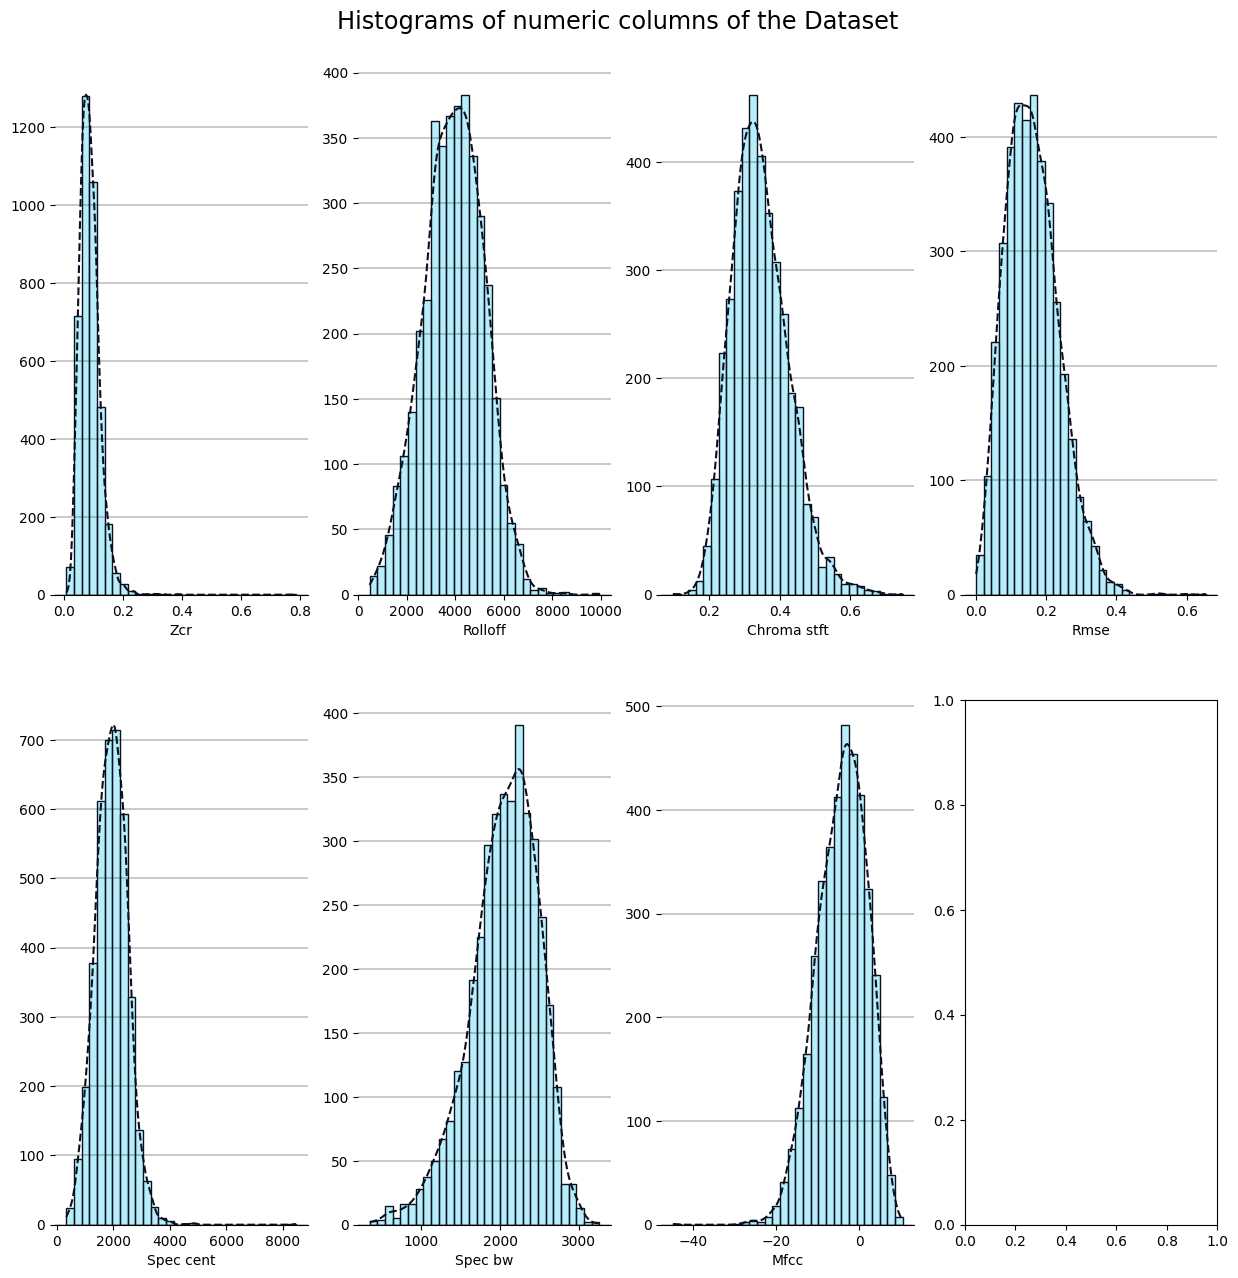

In [14]:
# distribution graphs for the numerical columns

cols = ['zcr','rolloff','chroma_stft','rmse','spec_cent','spec_bw','mfcc']

fig, axs = plt.subplots(2, 4, figsize=(15, 15))

for i, col in enumerate(cols):
    
    row_index = i // 4
    col_index = i % 4
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

## Correlation between all pairs:

<Axes: >

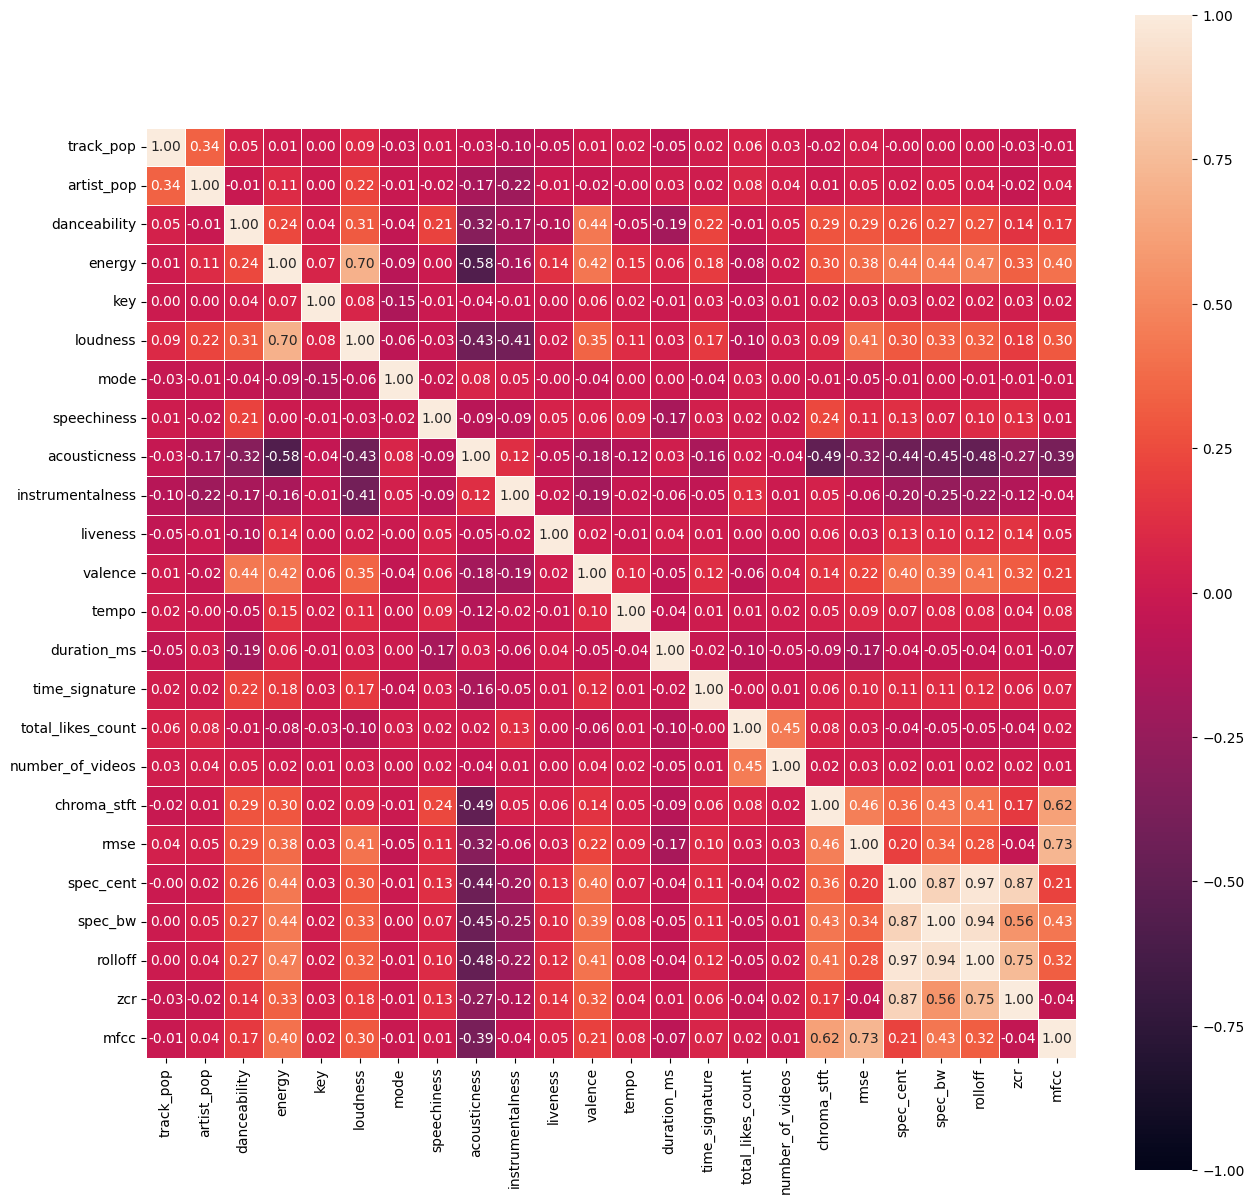

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = df.corr()
    
sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=.5, vmin=-1, vmax=1, fmt=".2f")
    

few takeovers: (#TODO: fix insights)

* artist_pop has the highest correlation with track_pop.
* total_likes_count has the highest correlation with number_of_videos. However, if we know the total number of likes, it is easy to estimate the number of videos and vice versa, meaning they are both hard.
* length and duration_ms has the maximum correlation (make sense).
* all other pairs has very low correlation.

# Useless with the heatmap above:

## Correlation of number of tiktoks with spotify track popularity and spotify artist popularity


In [ ]:
cols = ['track_pop', 'artist_pop']
fig, axs = plt.subplots(1,2,  figsize=(40, 15))

for i, col in enumerate(cols):
    
    col_index = i 
    
    ax = axs[col_index]
    
    scatter(df, 'number_of_videos', col, ax)
    

plt.show()
    

We can see that interestingly there is no strong correlation between popularity on spotify and popularity on tik tok.

## Correlation of audio features with tiktok popularity


In [ ]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'number_of_videos', col, ax)
    

plt.show()
    

We can see that the correlations are rather weak and not enough to help distinguish viral songs from the rest.